<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF-280 - Estadística Computacional </h1>
    <h2> Vectores aleatorios e Inferencia </h2>
    <h4> Diego Quezada </h4>
</center>

## Contenidos

* [Introducción](#intro)
* [Reglamento](#rules)
* [Experiencia](#experience)
    * [Vectores aleatorios](#vectors)
    * [Distribuciones multivariadas](#distributions)
    * [Text representation](#text)
    * [Maximum Likelihood Estimation](#mle)

<div id='intro' />

## Introducción

Los laboratorios de estadística computacional (LEC) tienen por objetivo principal analizar datos utilizando técnicas de visualización y evidenciar el comportamiento estocástico de experimentos aleatorios mediante simulaciones computacionales. Las experiencias buscan medir la habilidad de programación en Python y sus librerías, la capacidad de análisis estadístico y la comprensión de documentación, artículos y papers.

Recuerde que los laboratorios tienen una ponderación de 30% en la nota final del ramo.

<div id='rules' />

## Reglamento

1. El desarrollo de los laboratorios debe ser en **Python**.
2. El formato de entrega es un **archivo .ipynb**, es decir, un jupyter notebook.
3. El nombre del archivo de entrega del laboratorio $i$ debe seguir el siguiente formato: *lec-i-nombregrupo.ipynb*.
4. Se recomienda seguir las recomendaciones de estilo descritas en [PEP 8](https://www.python.org/dev/peps/pep-0008/) a la hora de programar.
5. El tiempo para la realización de los laboratorios es extenso, por lo que solo se recibirán entregas hasta las 23:59 del día de entrega **a menos que se especifique lo contrario**. Entregas fuera del plazo serán calificadas con nota 0.
6. Antes de entregar su laboratorio verifique su **reproducibilidad**. Jupyter Notebooks con errores a la hora de ejecutarse serán penalizados con descuentos.
7. Solo un integrante por grupo debe realizar la entrega por Aula.

<div id='experience' />

## Experiencia

En el presente laboratorio comprenderemos el comportamiento de **vectores aleatorios**, estudiaremos modelos simples para la **representación de texto** y estimaremos parámetros que nos permitirán definir la distribución subyacente a una muestra de datos.

### 0. Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp

<div id='vectors'/>

### 1. Vectores aleatorios (10 pts.)

Un vector aleatorio es un vector **X**$= (X_1, X_2, \dots, X_n)$ en donde $X_i$ son variables aleatorias.

Si estamos trabajando con un vector aleatorio de variables identicamente distribuidas podemos generar realizaciones de un "vector aleatorio" facilmente utilizando distribuciones univariadas de SciPy:

In [2]:
# Random variable definition
X = sp.uniform(loc=0,scale=20)
# Print random vector
print(f"Realización: {X.rvs(size=3)}")

Realización: [10.61615663 14.03968278  6.94197494]


Por supuesto podemos crear mejores representaciones del vector mediante tuplas o clases:

In [3]:
# Random vector as a tuple of functions (random variables)
X_vector = (sp.uniform(loc=0,scale=20), sp.poisson(5))
# Print sample
print(f"Realización: {X_vector[0].rvs(), X_vector[1].rvs()}")

Realización: (14.954393882112845, 9)


In [4]:
# Random vector as a class
class RandomVector:
    def __init__(self, vector):
        self.vector = vector
        self.size = len(vector)
        self.mean = [X.mean() for X in vector]
    def get_sample(self):
        return [X.rvs() for X in self.vector]

In [5]:
# Random vector object
Y_vector = RandomVector([sp.uniform(loc=0,scale=20), sp.poisson(5)])
# Print sample
print(f"Realización: {Y_vector.get_sample()}")
# Print mean
print(f"Vector de medias: {Y_vector.mean}")

Realización: [8.722120685306482, 4]
Vector de medias: [10.0, 5.0]


Al trabajar con distribuciones multivariadas [SciPy](https://docs.scipy.org/doc/scipy/reference/stats.html#multivariate-distributions) la representación del vector aleatorio es gratis:

In [6]:
# SciPy Multinomial random variable
Y = sp.multinomial(3, [1/6, 1/6, 2/3])
print(f"Realización: {Y.rvs(size=1)}")

Realización: [[1 0 2]]


In [7]:
# SciPy Multivariate normal random variable variable
Z = sp.multivariate_normal([20, 18], [[2,1],[1,4]])
print(f"Realización: {Z.rvs(size=1)}")

Realización: [19.01558237 16.0333797 ]


1.1) Defina el vector aleatorio que modela el experimiento aleatorio de lanzar $1000$ veces un dado no cargado de 6 caras **(2 pts.)**

**Respuesta:**

In [8]:
dice_experiment_1 = sp.multinomial(...)

1.2) Defina el vector aleatorio que modela el experimiento aleatorio de lanzar $1000$ veces un dado de 6 caras cargado en donde el número 1 tiene el doble de probabilidad de ocurrencia que los otros números **(3 pts.)**

**Respuesta:**

In [10]:
dice_experiment_2 = sp.multinomial(...)

1.3) Considere el experimento aleatorio asociado al lanzamiento de dos monedas no cargadas. Explique porqué al aumentar $n$ aumentan las varianzas y las covarianzas, ¿qué significa esto en el contexto del experimento? **(5 pts.)**

**Respuesta:** 

In [12]:
n = ...
coin_experiment = sp.multinomial(n, ...)

<div id='distributions'/>

### 2. Distribuciones multivariadas (20 pts.)

Estudiaremos ahora las distribuciones asociada a vectores aleatorios, en particular, aquellas que son graficables en el espacio tridimensional.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

Comencemos explorando las distribuciones multivariadas mediante la distribución normal bivariada:

In [15]:
N = sp.multivariate_normal([0, 0], 1)

Como es de costumbre, podemos acceder facilmente tanto al vector de medias como a la matriz de varianzas y covarianzas:

In [16]:
N.mean

array([0., 0.])

In [17]:
N.cov

array([[1., 0.],
       [0., 1.]])

Para visualizar esta distribución debemos crear una malla de puntos en el plano XY:

In [18]:
X, Y = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))

> Asegúrese de comprender la representación de $X$ e $Y$ pues es un tanto especial. Mediante el método ``flatten`` de la clase array de NumPy es posible volver a la representación clásica.

Luego, debemos obtener la densidad asociada a cada punto $(x,y)$ de la malla recién creada:

In [19]:
z = np.array([N.pdf([x,y]) for x,y in zip(X.flatten(), Y.flatten())])
Z = z.reshape(X.shape)

Ahora, podemos visualizar la distribución normal bivariada ``N`` mediante un gráfico de contornos:

In [20]:
def plot_contour(X,Y,Z,contours=20):
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X, Y, Z, contours, cmap="binary");
    ax.set_title("Distribución normal bivariada estándar")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

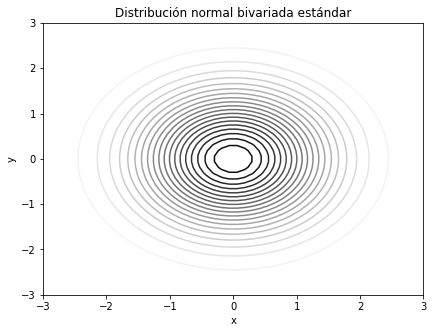

In [21]:
plot_contour(X,Y,Z)

Una visualización más interesante la podemos lograr utlizando mplot3d:

In [22]:
from mpl_toolkits import mplot3d

In [23]:
def plot_multivariate_pdf(X,Y,Z):
    
    fig = plt.figure(figsize=(15, 8))
    
    ax = plt.axes(projection="3d")
    ax.plot_wireframe(X, Y, Z, color="black")
    ax.set_title("Distribución normal bivariada estándar")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.view_init(10, 20)

    plt.show()

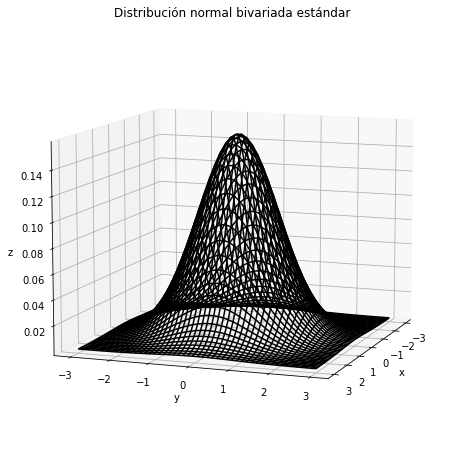

In [24]:
plot_multivariate_pdf(X,Y,Z)

2.1) Defina la función ``get_multinomial_rv(n, probabilities)`` que retorna una variable aleatoria **multinomial** con los parámetros ``n`` y ``probabilities`` indicados **(2 pts.)**


**Respuesta:**

In [25]:
def get_multinomial_rv(n,probabilities):
    M = ...
    return M

2.2) Defina la función ``get_multinomial_data(M, n)`` que genera una malla de puntos en el plano $XY$ para una variable aleatoria multinomial ``M`` con $k = 2$ posibles resultados y ``n`` repeticiones. Luego calcule la probabilidad para cada punto $(x,y)$ y retorne la malla en $XY$ y las probabilidades calculadas **(5 pts.)**

**Respuesta:**

In [26]:
def get_multinomial_data(M, n):
    X, Y = np.meshgrid(...)
    z = ...
    Z = z.reshape(X.shape)
    return X,Y,Z

2.3) Defina la función ``plot_multinomial_pmf(M, data)`` que grafica una variable aleatoria multinomial ``M``con $k=2$ posibles resultados utilizando los datos en la tupla ``data`` de la forma $(X,Y,Z)$ **(3 pts.)**

**Respuesta:**

In [27]:
def plot_multinomial_pmf(M,data):
    
    X,Y,Z = data
    
    ....
        
    plt.show()

2.4) Utilizando su funcion ``plot_multinomial_pmf(M,data)`` grafique ``M`` tal como es definida en la siguiente celda. Luego responda:
1. ¿Por qué tan pocos pares $(x,y)$ de la malla tienen asociado una probabilidad distinta de 0? **(3 pts.)**
2. ¿Por qué es de esperarse que pares cercanos a (5,5) tengan una alta probabilidad de ocurrencia? **(2 pts.)**

In [28]:
n = 10
M = get_multinomial_rv(n,[0.5,0.5])
X,Y,Z = get_multinomial_data(M,n)
data = (X,Y,Z)

**Respuesta:**

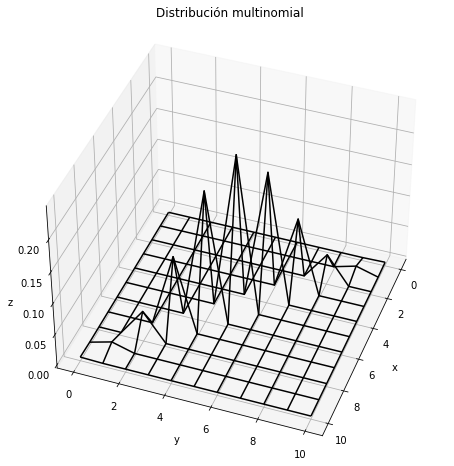

In [29]:
plot_multinomial_pmf(M, data)

2.5) Considere la variable aleatoria multinomial ``C`` definida en la siguiente celda. ¿En qué tipo de experimento utilizaría esta variable aleatoria?, ¿cómo se puede interpretar su vector de medias? **(5 pts.)**

**Respuesta:**

In [30]:
# Define probabilities vector
probabilities = [...]

# Define random variable C
#C = get_multinomial_rv(1,probabilities)

<div id='text'/>

### 3. Representación de texto (30 pts.)

La representación de texto es un problema clásico en minería de datos y NLP. Su objetivo es **representar** el texto matemáticamente mediante vectores o matrices de forma que el computador pueda entender de mejor manera su compleja estructura.

En la siguiente sección, se tiene por objetivo aplicar los vectores aleatorios y las distribuciones de probabilidad en un caso práctico en donde se busca plantear distintas formas de modelar texto, en particular, las reviews de [Alexa](https://www.kaggle.com/sid321axn/amazon-alexa-reviews).

In [31]:
alexa_reviews = pd.read_csv("./datasets/alexa_reviews.csv")

3.1) Considere un conjunto $D$ (diccionario) de $n$ palabras. ¿Cómo se podría modelar mediante un vector de variables aleatorias Bernoulli la ocurrencia de cada oración (statement) que se puede formar a partir del diccionario $D$?, mencione sus supuestos **(5 pts.)**

**Hint:** No considere el orden de las palabras en la oración.


**Respuesta:**

3.2) Aplique su método descrito en 3.1 para construir un vector aleatorio que modele la ocurrencia de las review de Alexa **(15 pts.)**

**Hint 1:** Debe realizar un preprocesamiento de datos adecuado para solo considerar las palabras.

**Hint 2:** Bag of words.

**Respuesta:**

3.3) Al utilizar un modelo de representación Bernoulli como el planteado en 3.1 no se considera la frecuencia de cada palabra en un texto, sino que solo si ocurre o no. Por ejemplo, la representación de "alexa is amazing" y "alexa is amazing amazing amazing amazing" es la misma.

Plantee un modelo alternativo que considere lo recién mencionado  **(5 pts.)**

**Respuesta:**

3.4) ¿Qué **representación esperada** tiene una review de Alexa? **(2 pts.)**

**Respuesta:**

3.5) Desde un punto de vista probabilístico, ¿qué problema conlleva la representación de todas las oraciones con un mismo vector aleatorio de tamaño fijo $n$?  **(3 pts.)**

**Respuesta:**

<div id='mle'/>

### 4. Maximum likelihood estimation (40 pts.)

Dada una muestra $X_1, X_2, \dots, X_n$ donde $X_i \sim f$. ¿Cómo podemos encontrar $f$?

La inferencia estadística es el proceso mediante el cual se busca descubrir la distribución de probabilidad que generó una muestra disponible. Notemos que esto es un cambio de paradigma importante, hasta el momento analizabamos estadísticamente un experimento aleatorio definido mediante variables aleatorias con distribuciones de probabilidad conocidas. Ahora, en base a una muestra nos interesa descubrir qué distribución de probabilidad subyace a los datos, o explicado de otra forma, qué distribución explica los datos. 

El Método de Máxima Verosimilitud es un método de inferencia paramétrica, en donde dada una muestra $X_1, X_2, \dots, X_n$ y un modelo paramétrico $f(x_i;\theta)$ se busca ajustar $\theta$ maximizando la función de verosimilitud.

<img src="./images/likelihood.png" style="width:100%">

Las siguientes funciones pueden ser de utilidad:

In [33]:
def plot_sample(sample,title="",bins=100,figsize=(10,4),xlabel="x",ylabel="frecuencia"):
    fig = plt.figure(figsize=figsize)
    ax = plt.axes()
    ax.hist(sample,bins=bins)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid(color='gray', linestyle='solid')
    plt.show()
    
def plot_scatter(x,y,title="",figsize=(10,4),xlabel="x",ylabel="y"):
    fig = plt.figure(figsize=figsize)
    ax = plt.axes()
    ax.plot(x,y,'-ok')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid(color='gray', linestyle='solid')
    plt.show()    

4.1) Investigue y explique detalladamente qué representa la función de verosimilitud y por qué nos interesa maximizarla **(3 pts.)**

**Respuesta:**

4.2) Defina la función ``get_sample(X,parameters,size=1000)`` que retorna una muestra de tamaño ``size`` generada por una variable aleatoria X parametrizada por la lista de paramétros ``parameters`` **(2 pts.)**

**Hint:** [Unpacking operator](https://www.python.org/dev/peps/pep-0448/)

**Respuesta:**


In [34]:
def get_sample(X,parameters,size=1000):
    X = ...
    sample = ...
    return sample

4.3) Defina la función ``likelihood(sample,X,parameters)`` que calcula la función de verosimilitud a partir de una muestra ``sample`` y una **variable aleatoria discreta** ``X`` parametrizada por la lista de parámetros ``parameters``  **(5 pts.)**


**Respuesta:**

In [35]:
def likelihood(sample,X,parameters):
    X = ...
    probabilities = ...
    return ...

4.4) ¿Qué problema trae consigo la representación de la función likelihood en un computador cuando la muestra es grande?, explique **(2 pts.)**

**Respuesta:**

4.5) Defina la función ``log_likelihood(sample,X,parameters)`` que calcula función log verosimilitud a partir de una muestra ``sample`` y una **variable aleatoria discreta** ``X`` parametrizada por la lista de parámetros ``parameters``  **(3 pts.)**

**Respuesta:**

In [36]:
def log_likelihood(sample,X,parameters):
    X = 
    probabilities = 
    return ...

4.6) Defina la función ``get_loglikelihood_images(X,parameters,thetas,size=1000)`` que crea una muestra usando la **variable aleatoria discreta** ``X`` y la lista de parámetros ``parameters`` y retorna las imágenes de la función log-likelihood asociadas a cada $\bar{\theta}$ en ``thetas`` y la muestra generada.

Considere que cada $\bar{\theta}$ es una lista de parámetros para ``X`` (al igual que ``parameters``) **(5 pts.)**


**Respuesta:**

In [37]:
def get_log_likelihood_images(X,parameters,thetas,size=1000):
    sample = ...
    log_likelihood_parcial = lambda parameters: log_likelihood(sample,X,parameters)
    y = ...
    return y,sample

4.7) Considerando una variable aleatoria $X \sim \text{Poisson}(25)$, genere y grafique una muestra aleatoria. Luego, grafique la función log-likelihood asociada a $X$ en en el intervalo $[1,50]$ **(5 pts.)**


**Respuesta:**

In [38]:
X = sp.poisson
parameters = [25]
thetas = np.arange(1,51)
thetas_as_list = ...
log_likelihood_values,sample = ...

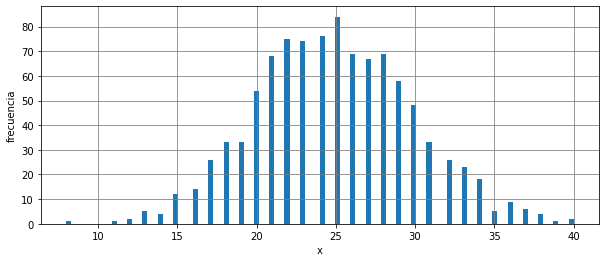

In [39]:
plot_sample(sample)

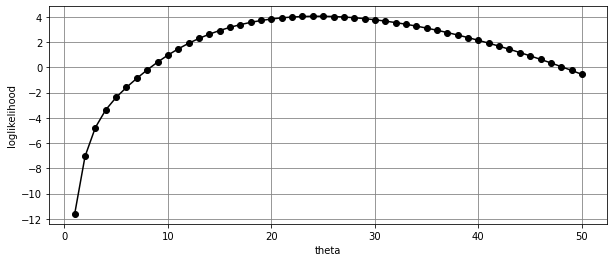

In [40]:
plot_scatter(thetas,log_likelihood_values,xlabel="theta",ylabel="loglikelihood")

4.8) En base al gráfico generado en la pregunta anterior, ¿cuál es el valor $\hat{\theta}$ que maximiza su función ``log_likelihood``?, explique **(5 pts.)**

**Respuesta:**

4.9) Defina la función ``get_mle(thetas,log_likelihood)`` que retorna el estimador máximo verosimil $\hat{\theta}$. Luego, grafique la distribuición Poisson $\hat{X} \sim \text{Poisson}(\hat{\theta})$, ¿se ajusta su gráfica a la distribución de la muestra graficada en 3.7? **(5 pts.)**

**Respuesta:**

In [41]:
def get_mle(thetas,log_likelihood_values):

    ...
    
    return mle

Los datos suelen traer consigos múltiples errores inducidos por distintas fuentes. Veamos cómo varía la distribución inferida en la pregunta anterior cuando se agrega un ruido aleatorio a la muestra graficada en 4.7.

4.10) Defina una nueva muestra agregando un ruido "gaussiano" a cada uno de los datos de la muestra generada en 4.7, luego calcule el estimador máximo verosimil $\hat{\theta}_r$ considerando esta muestra ruidosa y grafique $\hat{X}_r \sim \text{Poisson}(\hat{\theta}_r)$ para compararla con la generada en 4.9 **(5 pts.)**

**Hint:** Solo agregue ruidos enteros a la muestra, de lo contrario tendrá problemas al calcular la PMF de Poisson.

**Respuesta:**

## The end of the road (or the beginning of a new one) 

In [45]:
print("""
Felicitaciones ! Ya completaste el tercer laboratorio de Estadística Computacional :') . Sin lugar a dudas fue
una experiencia desafiante, espero que también enriquecedora. 

Aprovecha tus nuevas habilidades !.
""")


Felicitaciones ! Ya completaste el tercer laboratorio de Estadística Computacional :') . Sin lugar a dudas fue
una experiencia desafiante, espero que también enriquecedora. 

Aprovecha tus nuevas habilidades !.

